Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

1. Carga de librerias y dataset

In [4]:
# Your import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

2. Eliminar duplicados

In [ ]:
df.duplicated().sum()
duplicated_rows = df[df.duplicated()]
print(f'Número de filas duplicadas: {duplicated_rows.shape[0]}')
#Número de filas duplicadas: 0

Número de filas duplicadas: 0


In [ ]:
# Eliminar duplicados / segunda forma
df_cleaned = df.drop_duplicates()

# Confirmar que ya no hay duplicados
print(f'Shape data set : {df.shape}')
print(f'Shape data set sin duplicados: {df_cleaned.shape}')

# Shape data set : (48895, 16)
# Shape data set sin duplicados: (48895, 16)

Shape data set : (48895, 16)
Shape data set sin duplicados: (48895, 16)


El dataset no tiene filas duplicadas

3. Eliminar columnas irrelevante

In [10]:
df.columns

# Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
#        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
#        'minimum_nights', 'number_of_reviews', 'last_review',
#        'reviews_per_month', 'calculated_host_listings_count',
#        'availability_365'],
#       dtype='object')

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Para realizar el analisis exploratorio eliminamos variables como id,name,host_id, host_name ya que consideramos no son importantes en el análisis exploratorio, también se elimina la variable neighbourhood ya que es muy especifica y tiene muchos valores y puede estar incluida en una mas general como neighbourhood_group. También eliminamos la columna number_of_reviews y reviews per month ya que tiene más de 10.000 valores nulos.

In [11]:
df.drop(columns=['id', 'name', 'host_id', 'host_name','neighbourhood','last_review','reviews_per_month'], inplace=True)

4. Identificar y guardar columnas por tipo para posterior análisis

In [ ]:
var_categoricas = []
var_numericas= []

for col in df.columns:
    if df[col].dtype == 'object':
        var_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas.append(col)

print("Variables categóricas:")
print(var_categoricas)

print("\n")
print("Variables numéricas:")
print(var_numericas)


# Variables categóricas:
# ['neighbourhood_group', 'room_type']


# Variables numéricas:
# ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Variables categóricas:
['neighbourhood_group', 'room_type']


Variables numéricas:
['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


3. Analisis univariable

3.1 Analisis de variables categoricas

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64


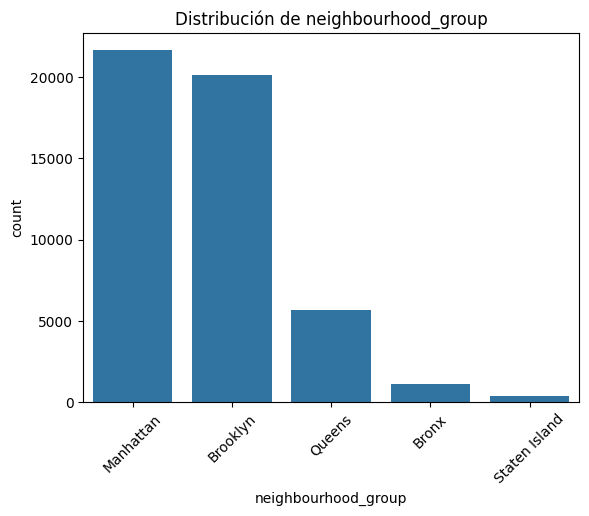

room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64


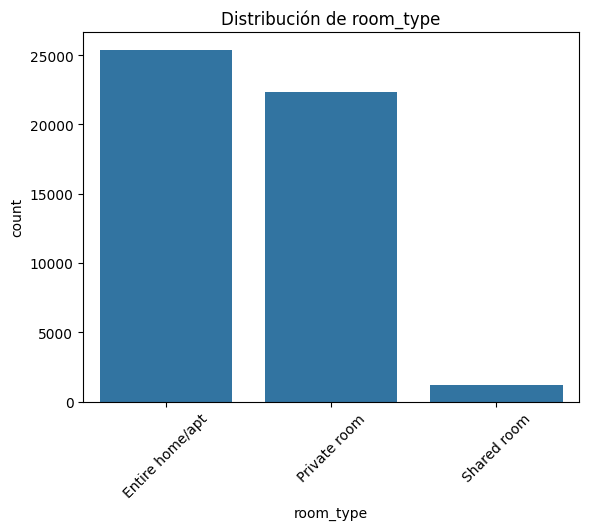

In [13]:
for col in var_categoricas:
    print(df[col].value_counts(normalize=True)[:10])  # top 10
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

En el dataset del Airbnb en NYC, Manhattan tiene una mayor concentración del total con un 44.3% y Brooklyn el 44.1% y juntos representan mas del 85% de las propiedades que prestan servicios de Airbnb lo que indica que son epicentros turiticos, a diferencia de Queens, Bronx y Staten island que representan casi el 15% de propiedades del Airbnb.

El tipo de alojamiento Entire home/apt ( Apartamentos completos) represental el 51.9% de las propiedades, private room ( habitaciones privadas) representa un 45.6% lo que podría indicar precios más economicos y shared room (Habitaciones compartidas) tiene el 2.3% lo que indica que no hay tanta oferta para este tipo de alojamiento.

3.2 Análisis de variables numéricas

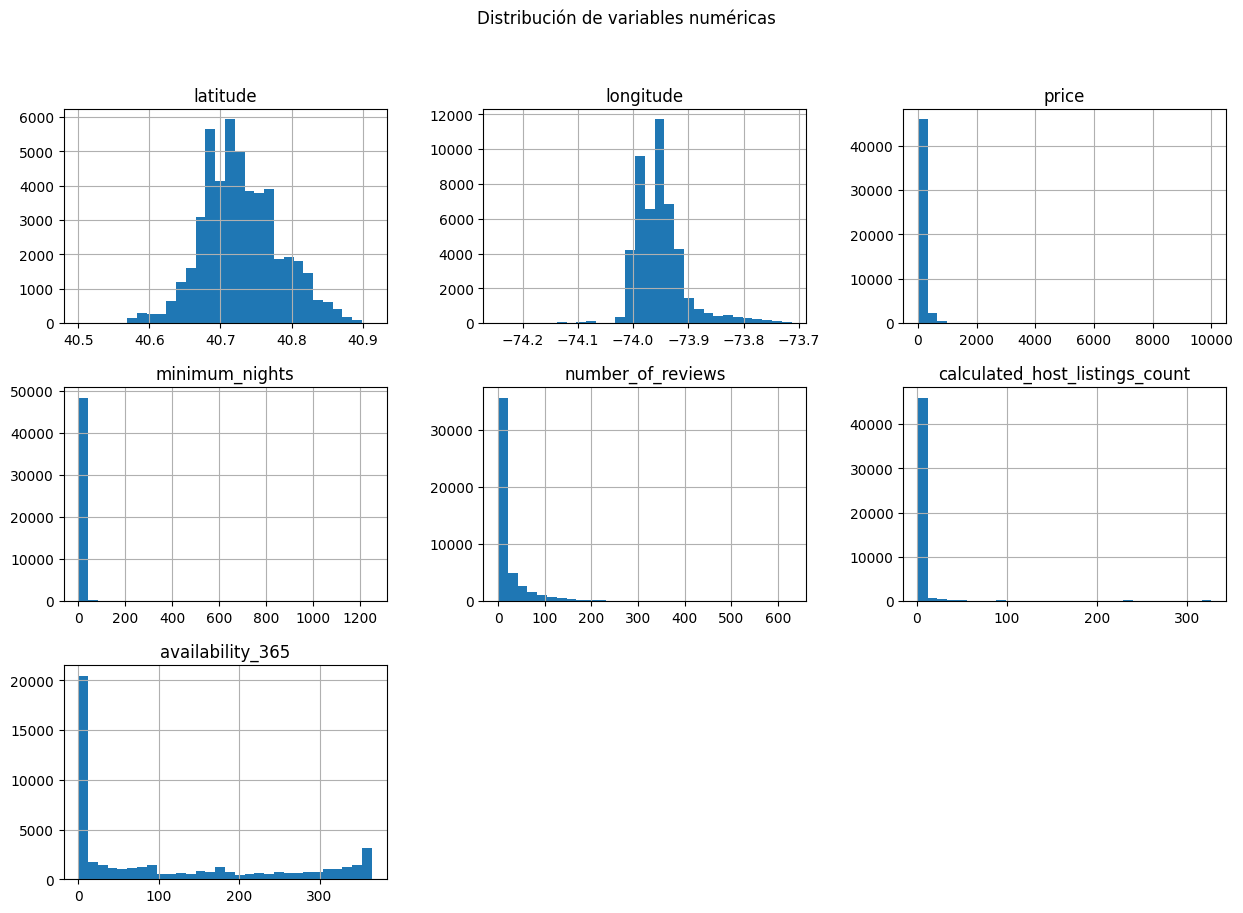

In [14]:
df[var_numericas].describe().T
df[var_numericas].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas")
plt.show()

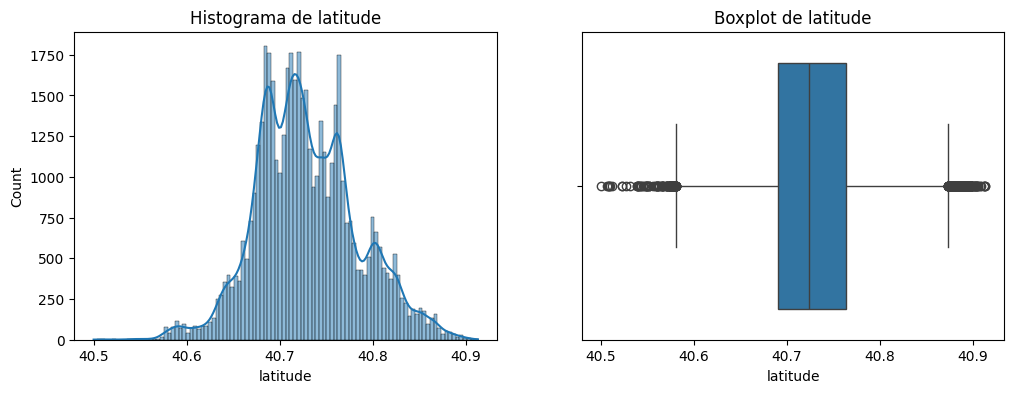

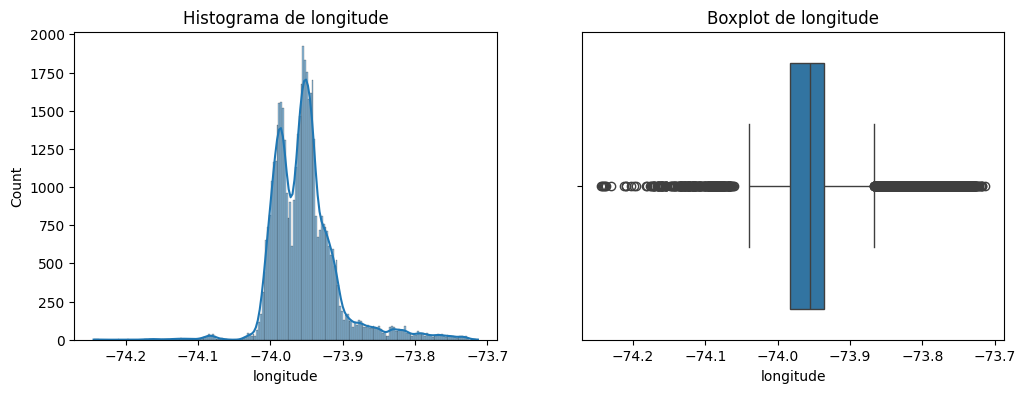

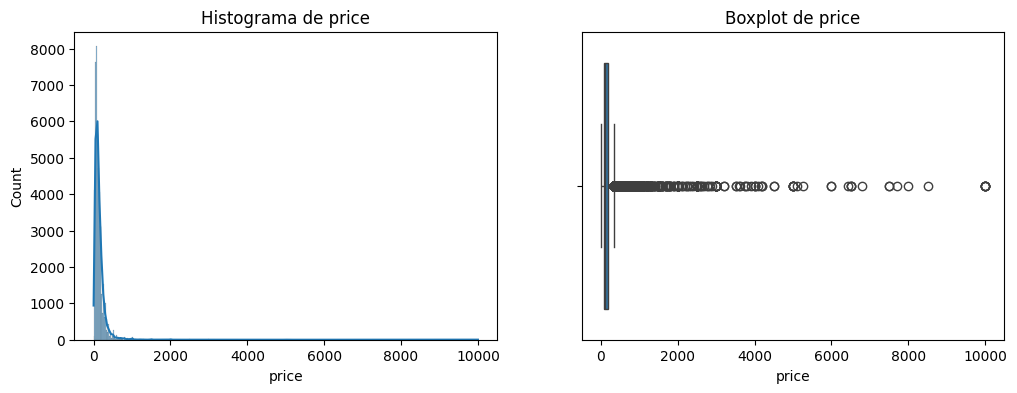

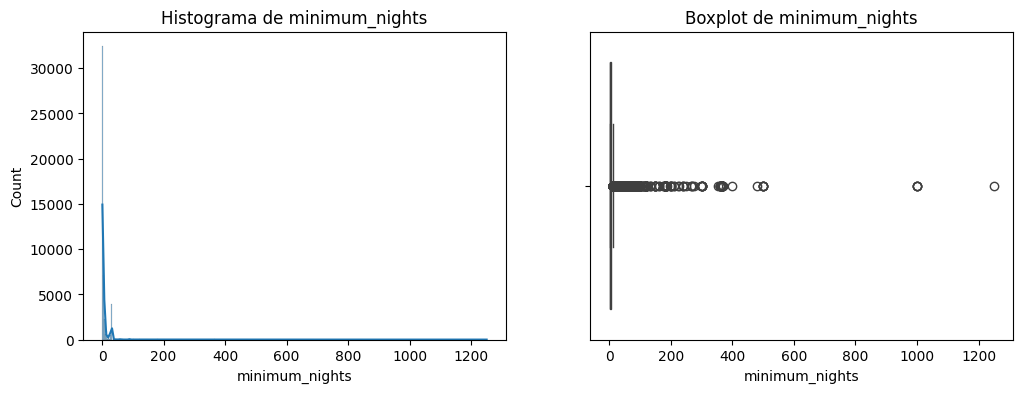

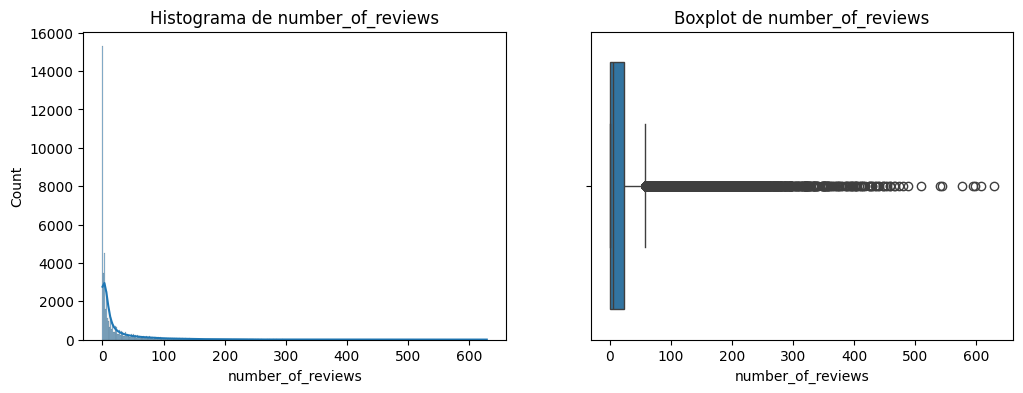

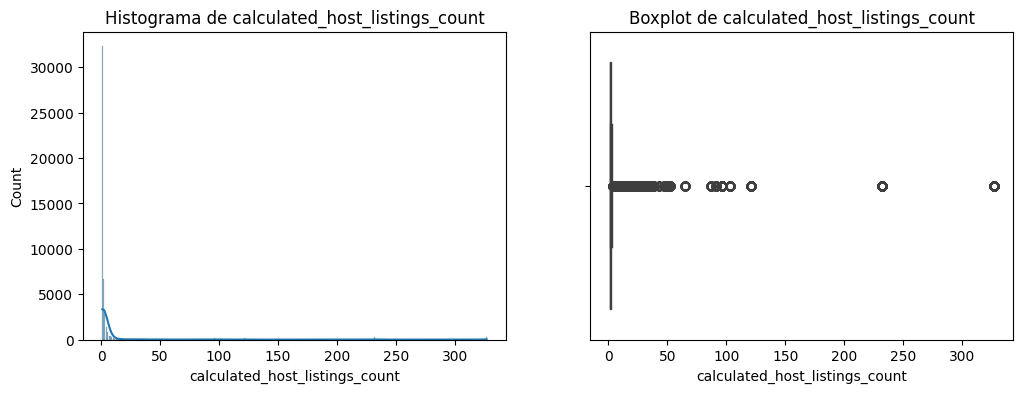

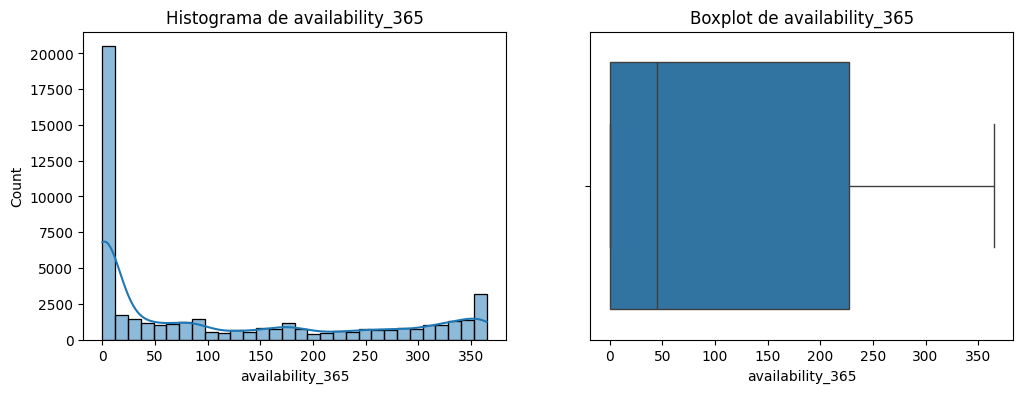

In [15]:
for col in var_numericas:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Analisis de valores atipicos por porcentaje en cada columna

In [ ]:
def porcentaje_outliers(df):
    porcentajes = {}
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        porcentaje = len(outliers) / len(df) * 100
        porcentajes[col] = round(porcentaje, 2)

    return porcentajes

# Resultado
print(porcentaje_outliers(df))

# {'latitude': 0.87, 'longitude': 5.79, 'price': 6.08, 'minimum_nights': 13.51, 'number_of_reviews': 12.31, 
#  'reviews_per_month': 3.67, 'calculated_host_listings_count': 14.48, 'availability_365': 0.0}


{'latitude': 0.87, 'longitude': 5.79, 'price': 6.08, 'minimum_nights': 13.51, 'number_of_reviews': 12.31, 'calculated_host_listings_count': 14.48, 'availability_365': 0.0}


In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Q1: 40.6901
# Q3: 40.763115
# IQR: 0.07301499999999805
# Lower Bound: 40.580577500000004
# Upper Bound: 40.872637499999996

Q1: 40.6901
Q3: 40.763115
IQR: 0.07301499999999805
Lower Bound: 40.580577500000004
Upper Bound: 40.872637499999996


Latitude tiene un 0.87% de valores atipicos de datos atípicos no se considera de gran impacto para justificar la elminación de estos valores.

Las variables en la que los valores atipicos tienen mas del 5% de los datos se descartó la eliminación de estos porque representan una gran pérdida de información.

4. Análisis multivariable

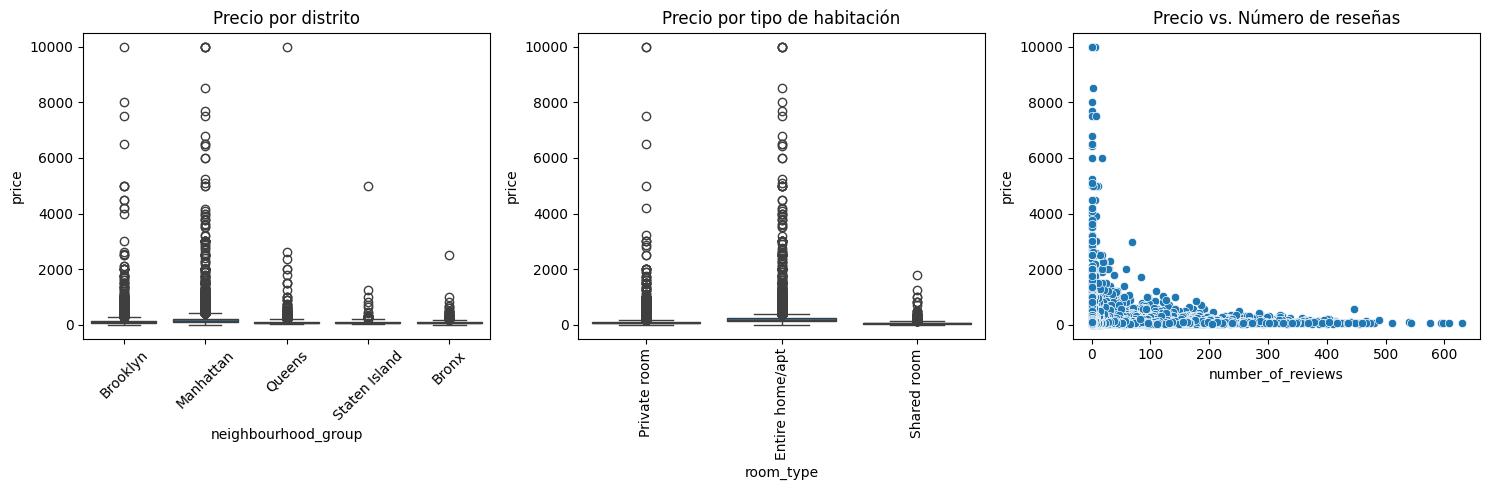

In [19]:
plt.figure(figsize=(15, 5))

# Precio por neighbourhood_group
plt.subplot(1, 3, 1)
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Precio por distrito')
plt.xticks(rotation=45)

# Precio por room_type
plt.subplot(1, 3, 2)
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precio por tipo de habitación')
plt.xticks(rotation=90)

# Precio por número de reviews
plt.subplot(1, 3, 3)
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Precio vs. Número de reseñas')

plt.tight_layout()
plt.show()

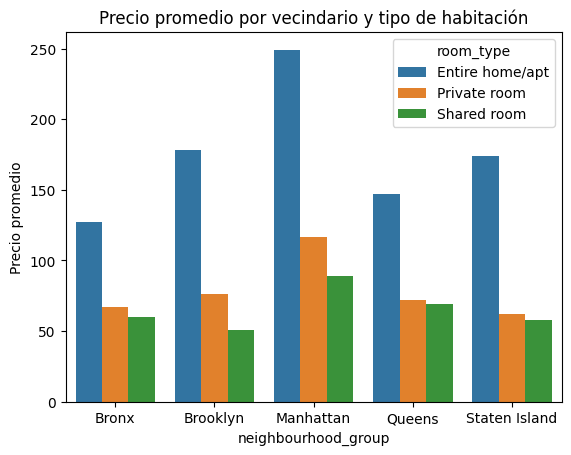

In [20]:
summary = df.groupby(['neighbourhood_group', 'room_type'])[['price']].mean().reset_index()

sns.barplot(data=summary, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Precio promedio por vecindario y tipo de habitación')
plt.ylabel('Precio promedio')
plt.show()


Se confirma lo anteriormente descrito que el precio por tipo de habitación es más economico para el tipo de alojamiento de habitaciones privadas que para los apartamentos completos.

Como complemento de la gráfica anterior podemos visualizar los datos atipicos de los precios de los vecindarios agrupados y por tipo de habitación.

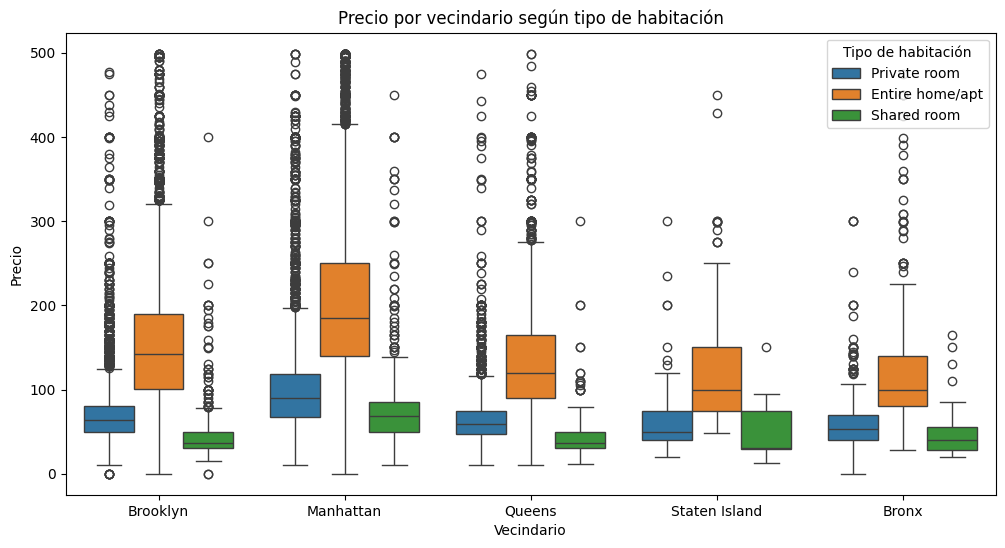

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['price'] < 500],  # limitamos para evitar outliers extremos
    x='neighbourhood_group',
    y='price',
    hue='room_type'
)
plt.title('Precio por vecindario según tipo de habitación')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.legend(title='Tipo de habitación')
plt.show()


El siguiente gráfico se hizo con el objetivo de revisar si el recibir más reseñas influia en el precio del tipo de alojamiento pero no fue así ya que se considera que sería más descriptivo el conocer el tipo de reseña que tiene cada alojamiento para así saber si esto influye o no en el precio.

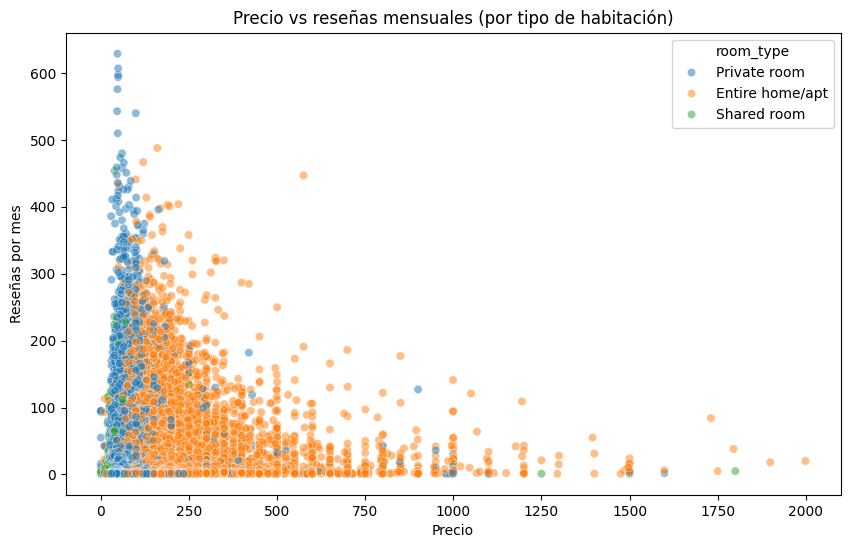

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df[(df['price'] < 2000) & (df['number_of_reviews'] > 0)],
    x='price',
    y='number_of_reviews',
    hue='room_type',
    alpha=0.5
)
plt.title('Precio vs reseñas mensuales (por tipo de habitación)')
plt.xlabel('Precio')
plt.ylabel('Reseñas por mes')
plt.show()


Disponibilidad por vecindario

Brooklyn y Manhattan al ser los epicentros turisticos con mayor cantidad de alojamientos en el dataset, tienen menor disponibilidad que los otras vecinadrios que tienen menos cantidad de alojamientos en el dataset y tienen mayor disponibilidad.

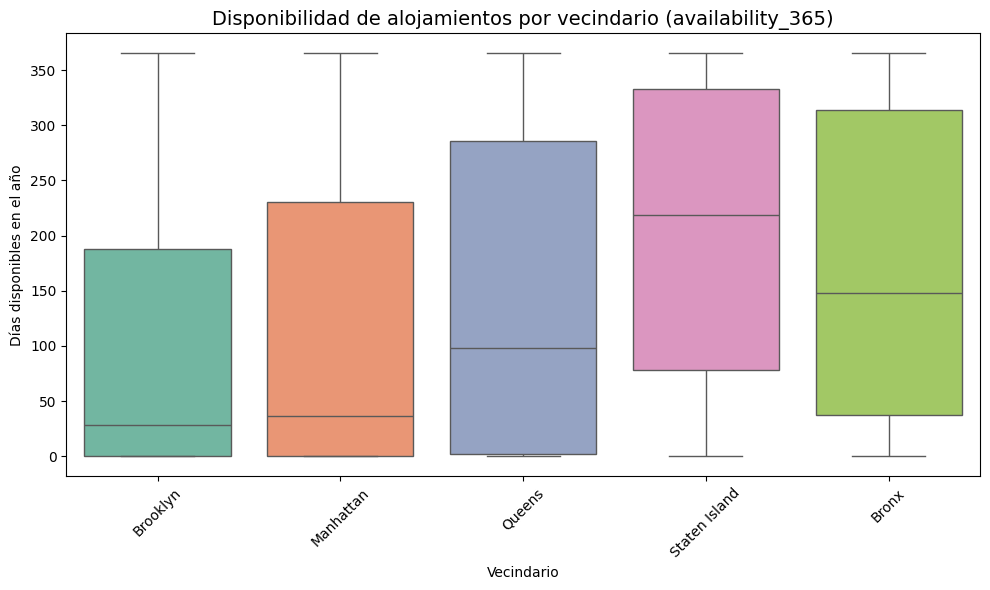

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', hue='neighbourhood_group',palette='Set2')

plt.title('Disponibilidad de alojamientos por vecindario (availability_365)', fontsize=14)
plt.xlabel('Vecindario')
plt.ylabel('Días disponibles en el año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. Analisis de correlación

5.1 Transformación de variables categóricas para correlación

In [ ]:
room_type_unicos = df['room_type'].unique()
print(room_type_unicos)

neighbourhood_unique = df['neighbourhood_group'].unique()
print(neighbourhood_unique)



['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [26]:
df['neighbourhood_group']=df['neighbourhood_group'].map({'Manhattan':0,'Brooklyn':1,'Queens':2,'Staten Island':3,'Bronx':4})
df['room_type']=df['room_type'].map({'Entire home/apt':0,'Private room':1,'Shared room':2,'Hotel room':3})

In [27]:
room_type_unicos = df['room_type'].unique()
print(room_type_unicos)

neighbourhood_unique = df['neighbourhood_group'].unique()
print(neighbourhood_unique)


[1 0 2]
[1 0 2 3 4]


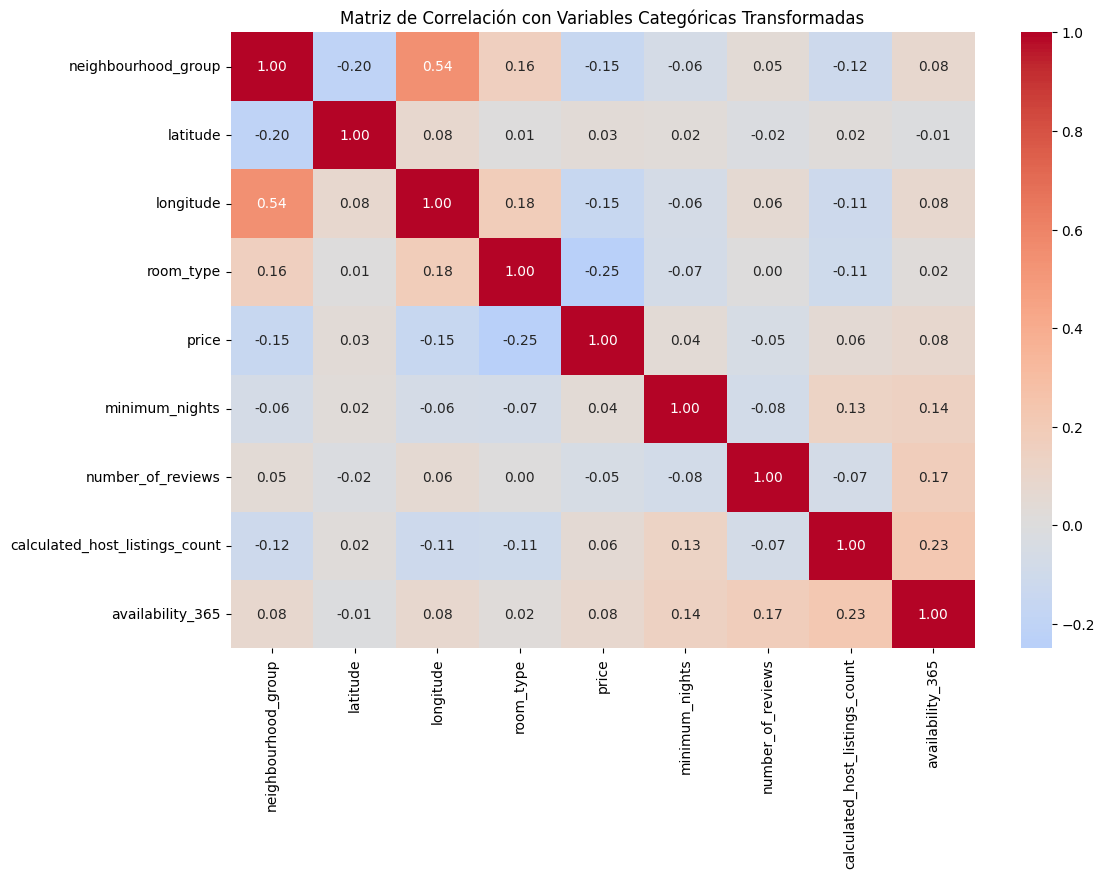

In [28]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Visualizar
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación con Variables Categóricas Transformadas')
plt.show()

Se considera que presentan una correlación 'longitude' y 'neighbourhood_group', 'latitude' y 'neighbourhood_group', pero es porque son datos geograficos, tendrían esta correlación pero solo tendrían importancia geografica.

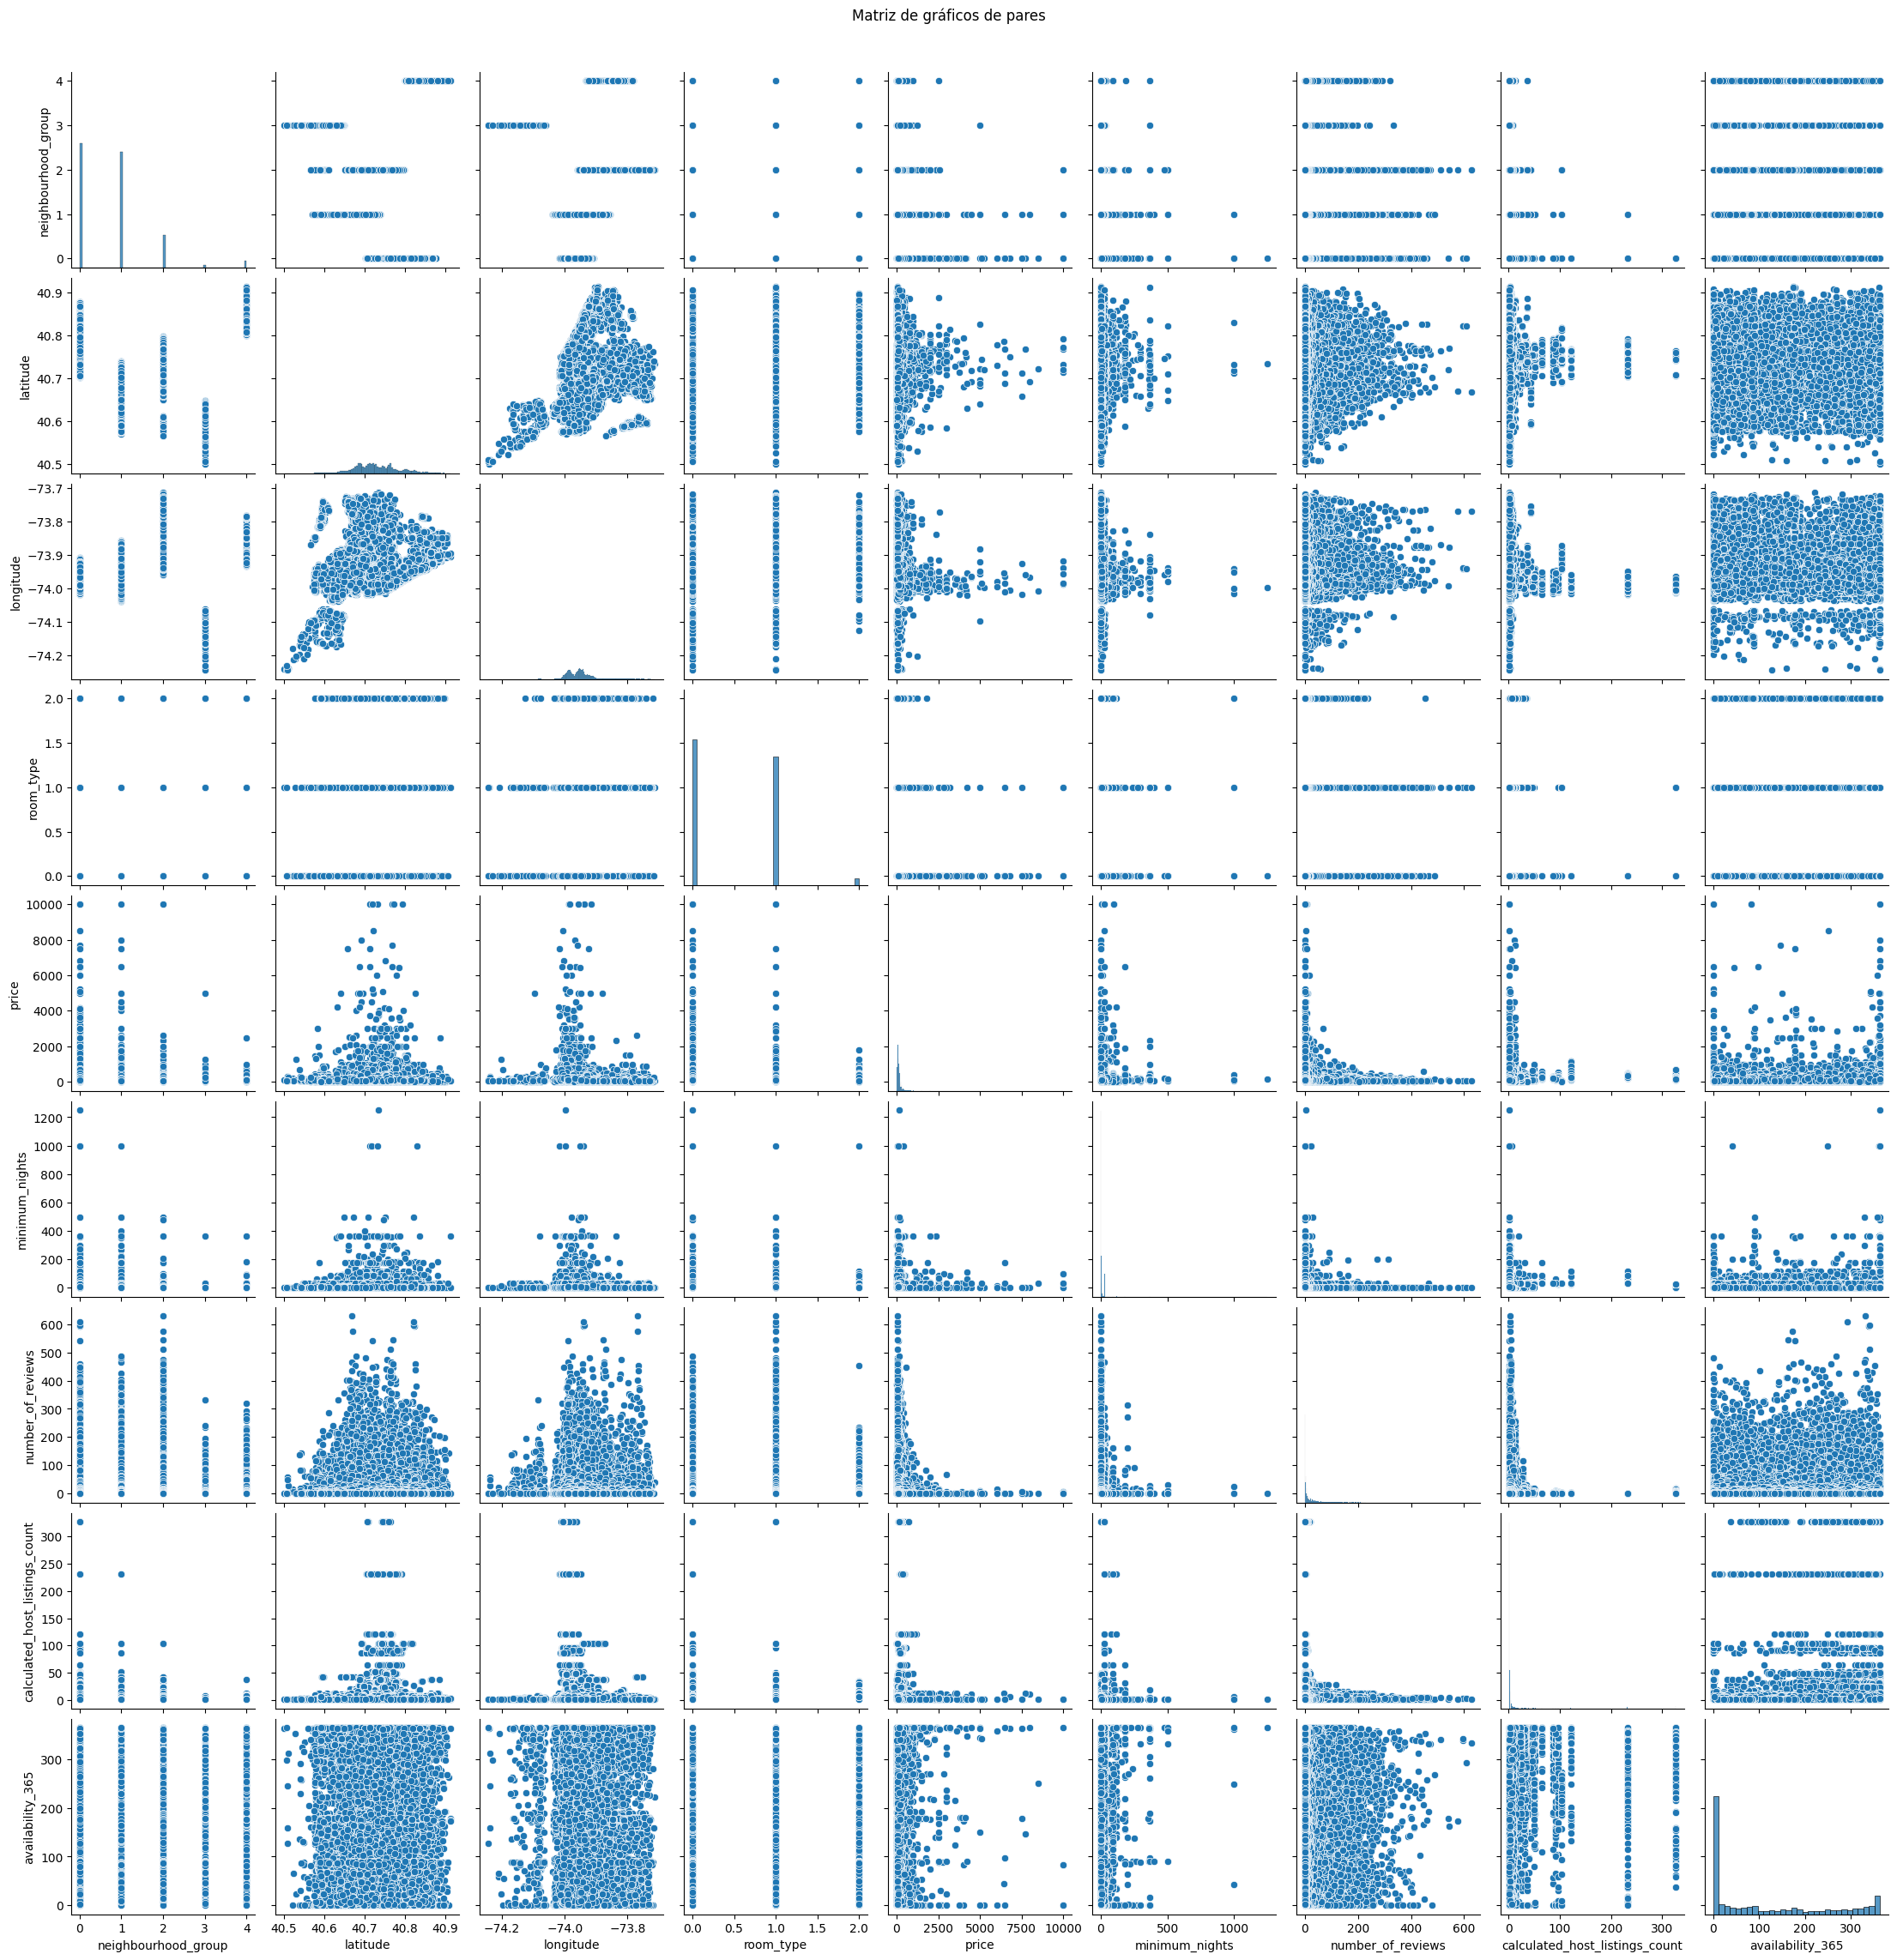

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
num_cols = df #.select_dtypes(include='number')

# Generar pairplot
sns.pairplot(num_cols)
plt.suptitle("Matriz de gráficos de pares", y=1.02)
plt.show()